# Monitoring IoT Sensors (Temperature & Humidity)
# With SQLite3 In Real Time

<img src="https://github.com/leehaesung/NodeRED/raw/master/02_CodeFiles/10_ESP8266-01/01_Images/ESP8266_DHT11.jpg" height="400" width="450" >

<img src="https://github.com/leehaesung/NodeRED/blob/master/02_CodeFiles/10_ESP8266-01/01_Images/ESP8266-01+DHT11ForIoTDataAnalytics.png?raw=true" height="400" width="450" >

* How to install Paho-MQTT :
```
sudo pip install paho-mqtt
```

## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [1]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
conn.execute('''CREATE TABLE HOME
         (TIME INT PRIMARY KEY     NOT NULL,
         LOCAL           INT    NOT NULL,
         TEMP           INT    NOT NULL,
         HUM            INT     NOT NULL);''')
print "Table created successfully";

conn.close()

Table created successfully


## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [2]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";

conn.execute("INSERT INTO HOME (TIME, LOCAL,TEMP,HUM) \
      VALUES (1514288285151, 20171226223805, 26.9, 31.7)");

conn.execute("INSERT INTO HOME (TIME, LOCAL,TEMP,HUM) \
      VALUES (1514288287917, 20171226223807, 25.2, 30.1)");

conn.execute("INSERT INTO HOME (TIME, LOCAL,TEMP,HUM) \
      VALUES (1514288290994, 20171226223810, 24.5, 29.8)");

conn.execute("INSERT INTO HOME (TIME, LOCAL,TEMP,HUM) \
      VALUES (1514288293771, 20171226223813, 24.1, 28.2)");

conn.execute("INSERT INTO HOME (TIME, LOCAL,TEMP,HUM) \
      VALUES (1514288296520, 20171226223816, 23.2, 27.9)");

conn.execute("INSERT INTO HOME (TIME, LOCAL,TEMP,HUM) \
      VALUES (1514288299285, 20171226223819, 22.8, 26.1)");

# (1514288285151, 20171226223805, 26.1, 31.2)
# (1514288287917, 20171226223807, 25.2, 30.1)
# (1514288290994, 20171226223810, 24.5, 29.2)
# (1514288293771, 20171226223813, 24.1, 28.4)
# (1514288296520, 20171226223816, 23.2, 27.2)
# (1514288299285, 20171226223819, 22.3, 26.8)

conn.commit()
print "Records created successfully";
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [33]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
   print "UTC Time   = ", row[0] 
   print "Local Time   = ", row[1]
   print "Temperature  = ", row[2]
   print "Humidity = ", row[3], "\n"
   

print "Operation done successfully";
conn.close()

Opened database successfully
UTC Time   =  1514282358634
Local Time   =  20171201221145
Temperature  =  24
Humidity =  43 

Operation done successfully


In [36]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully"
print ""
print("   UTC Time   |  Local Time   |T,°C|H,%")
print("============================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
for row in cursor:
    print(row[0],row[1],row[2],row[3])
    
conn.close()

Opened database successfully

   UTC Time   |  Local Time   |T,°C|H,%
(1514282358634, 20171201221145, 24, 43)


#### Searching Temperature Data

In [37]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteIotEspDht')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print "Opened database successfully"
    print ""
    print("   UTC Time   |  Local Time   |T,°C|H,%")
    print("============================================")
    cursor = conn.execute("SELECT * from HOME WHERE TEMP = 24")
    
    for row in cursor:
        print(row[0],row[1],row[2],row[3])

In [38]:
# Put any temperature.
search_temperature(24)

Opened database successfully

   UTC Time   |  Local Time   |T,°C|H,%
(1514282358634, 20171201221145, 24, 43)


#### Searching Humidity Data

In [41]:
import sqlite3

def search_humidity(hum):
    conn = sqlite3.connect('sqliteIotEspDht')

    str1 = "SELECT * FROM HOME WHERE HUM = "
    str2 = str(hum)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print "Opened database successfully"
    print ""
    print("   UTC Time   |  Local Time   |T,°C|H,%")
    print("============================================")
    
    for row in cursor:
        print(row[0],row[1],row[2],row[3])

In [42]:
# Put any humidity data.
search_humidity(43)

Opened database successfully

   UTC Time   |  Local Time   |T,°C|H,%
(1514282358634, 20171201221145, 24, 43)


## Eclipse Paho™ MQTT Python Pub/Sub Client

In [1]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['esp8266sqlite']

m = subscribe.simple(topics, hostname="iot.eclipse.org", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)

esp8266sqlite
{"data":{"time":1514282356067,"local":20171226205916,"temp":25,"hum":32}}
esp8266sqlite
{"data":{"time":1514282358633,"local":20171226205918,"temp":25,"hum":31}}


In [ ]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    print("%s : %s" % (message.topic, message.payload))
    buf = message.payload
    
subscribe.callback(print_msg, "esp8266sqlite", hostname="iot.eclipse.org")

esp8266sqlite : {"data":{"time":1514282390109,"local":20171226205950,"temp":25,"hum":31}}
esp8266sqlite : {"data":{"time":1514282392889,"local":20171226205952,"temp":25,"hum":37}}
esp8266sqlite : {"data":{"time":1514282395498,"local":20171226205955,"temp":25,"hum":34}}
esp8266sqlite : {"data":{"time":1514282398031,"local":20171226205958,"temp":31,"hum":35}}
esp8266sqlite : {"data":{"time":1514282400562,"local":20171226210000,"temp":25,"hum":31}}
esp8266sqlite : {"data":{"time":1514282403095,"local":20171226210003,"temp":25,"hum":31}}
esp8266sqlite : {"data":{"time":1514282405620,"local":20171226210005,"temp":25,"hum":31}}
esp8266sqlite : {"data":{"time":1514282408145,"local":20171226210008,"temp":25,"hum":35}}
esp8266sqlite : {"data":{"time":1514282410920,"local":20171226210010,"temp":25,"hum":37}}
esp8266sqlite : {"data":{"time":1514282413482,"local":20171226210013,"temp":25,"hum":33}}
esp8266sqlite : {"data":{"time":1514282416007,"local":20171226210016,"temp":25,"hum":31}}
esp8266sql

##  INSERT QUERY (IN REAL TIME)

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [ ]:
import sys 
import sqlite3
import locale
import json

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";
print ""
print "INSERT OPERATION"
print("   UTC Time     |   Local Time    |T(°C)| H(%) ")
print("================================================")
    #  ('1514283554343', '20171226211914', '25', '31')

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    #print("%s : %s" % (message.topic, message.payload))
    data = message.payload
    # {"data":{"time":1514282423580,"local":20171226210023,"temp":25,"hum":31}}
    jsonData = json.loads(data)
    time = str(jsonData['data']['time'])
    local = str(jsonData['data']['local'])
    temp = str(jsonData['data']['temp'])
    hum = str(jsonData['data']['hum'])

            
    print(time, local, temp, hum)
    
    str1 = "INSERT INTO HOME (TIME,LOCAL,TEMP,HUM) \
      VALUES ("
    str2 = (time) 
    str3 = ", "
    str4 = (local)
    str5 = ", "
    str6 = (temp)
    str7 = ", "
    str8 = (hum)
    str9 = " )"
    insert = str1 + str2 + str3 + str4 + str5 + str6 + str7 + str8 + str9
    conn.execute(insert)
    conn.commit()

subscribe.callback(print_msg, "esp8266sqlite", hostname="iot.eclipse.org")

Opened database successfully

INSERT OPERATION
   UTC Time     |   Local Time    |T(°C)| H(%) 
('1514288285151', '20171226223805', '26', '31')
('1514288287917', '20171226223807', '26', '31')
('1514288290994', '20171226223810', '26', '31')
('1514288293771', '20171226223813', '26', '31')
('1514288296520', '20171226223816', '26', '31')
('1514288299285', '20171226223819', '26', '31')
('1514288302066', '20171226223822', '26', '31')
('1514288304814', '20171226223824', '26', '31')
('1514288307583', '20171226223827', '26', '31')
('1514288310956', '20171226223830', '26', '31')
('1514288313728', '20171226223833', '26', '31')
('1514288316493', '20171226223836', '26', '31')
('1514288319258', '20171226223839', '26', '31')
('1514288322013', '20171226223842', '26', '31')
('1514288324789', '20171226223844', '26', '31')
('1514288327551', '20171226223847', '26', '31')
('1514288330383', '20171226223850', '26', '31')
('1514288333176', '20171226223853', '26', '31')
('1514288335839', '20171226223855', '26',

## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [3]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully"
print ""
print("   UTC Time   |  Local Time   |T,°C|H,%")
print("================================================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    print(row[0],row[1],row[2],row[3])
    
conn.close()

Opened database successfully

   UTC Time   |  Local Time   |T,°C|H,%
(1514288285151, 20171226223805, 26.9, 31.7)
(1514288287917, 20171226223807, 25.2, 30.1)
(1514288290994, 20171226223810, 24.5, 29.8)
(1514288293771, 20171226223813, 24.1, 28.2)
(1514288296520, 20171226223816, 23.2, 27.9)
(1514288299285, 20171226223819, 22.8, 26.1)


## SELECT QUERY & PUSH DATA INTO BOX

In [4]:
import sqlite3

class Stack:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self, item):
        return self.items.pop(item)

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)


tempBox = Stack()
temPopBox = Stack() 
humBox = Stack()
humPopBox = Stack()
timeBox = Stack()

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully"
print ""

cursor = conn.execute("SELECT * from HOME WHERE HUM")
for row in cursor:
    tempBox.push(row[2])
    temPopBox.push(row[2])
    humBox.push(row[3])
    humPopBox.push(row[3])
    
    #print(row[0],row[1],row[2])

# Making time = 1,2,3,4 .... n    
max = len(tempBox.items)

for count in range(1,max+1):
    timeBox.push(count)
print "x(time) = "    
print timeBox.items
print ""
print "y1(Tepeurature) = " 
print tempBox.items
print ""
print "y2(Humidity) = "
print humBox.items
print ""

xTime = timeBox.items
y1Data = tempBox.items
y2Data = humBox.items
tData = temPopBox.items
hData = humPopBox.items

# Comparing between max and min in tData
highTemBit = tData.pop(max-1)
lowTemBit = tData.pop(0)


if highTemBit > lowTemBit:
    print "The temperature data is ascending."

elif highTemBit < lowTemBit:
    print "The temperature data is descending."
    
elif highTemBit == lowTemBit:
    print "The temperature data is stable."
    

# Comparing between max and min in hData
highHumBit = hData.pop(max-1)
lowHumBit = hData.pop(0)


if highHumBit > lowHumBit:
    print "The humidity data is ascending."

elif highHumBit < lowHumBit:
    print "The humidity data is descending."
    
elif highHumBit == lowHumBit:
    print "The humidity data is stable."

    
conn.close()

Opened database successfully

x(time) = 
[1, 2, 3, 4, 5, 6]

y1(Tepeurature) = 
[26.9, 25.2, 24.5, 24.1, 23.2, 22.8]

y2(Humidity) = 
[31.7, 30.1, 29.8, 28.2, 27.9, 26.1]

The temperature data is descending.
The humidity data is descending.


In [5]:
print "Max & Min Temperature:"
print highTemBit
print lowTemBit
print ""
print "Max & Min Humidity:"
print highHumBit
print lowHumBit

Max & Min Temperature:
22.8
26.9

Max & Min Humidity:
26.1
31.7


## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [47]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";

conn.execute("DELETE from HOME where LOCAL = 20171226215923;")
#conn.execute("DELETE FROM HOME WHERE TIME BETWEEN 1514283551781 AND 1514285943367;")
conn.commit()
print "Total number of rows deleted :", conn.total_changes

print ""
print("   UTC Time   |  Local Time   |T,°C|H,%")
print("================================================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1],row[2],row[3])

print "DELETE Operation done successfully";
conn.close()

Opened database successfully
Total number of rows deleted : 1

   UTC Time   |  Local Time   |T,°C|H,%
(1514285946139, 20171226215906, 26, 31)
(1514285948720, 20171226215908, 26, 31)
(1514285951291, 20171226215911, 26, 31)
(1514285954112, 20171226215914, 26, 31)
(1514285957163, 20171226215917, 26, 31)
(1514285960257, 20171226215920, 26, 31)
DELETE Operation done successfully


## DROP TABLE

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [116]:
import sqlite3
conn = sqlite3.connect('sqliteIotEspDht')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print "Deleted the table successfully"
conn.commit()
conn.close()

Deleted the table successfully


# TensorFlow Analytics

* Linear Regression
     ```
     Linear Regression Model = W * x + b
     ```

#### Analyzing Temperature Data

In [6]:
# From https://www.tensorflow.org/get_started/get_started
import tensorflow as tf

# Model parameters
W1 = tf.Variable([.3], dtype=tf.float32)
b1 = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x1 = tf.placeholder(tf.float32)
linear_model1 = W1*x1 + b1
y1 = tf.placeholder(tf.float32)

# loss
loss1 = tf.reduce_sum(tf.square(linear_model1 - y1)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train1 = optimizer.minimize(loss1)

# training data
x1_train = xTime
y1_train = y1Data
print("x1 data = %s"%(xTime))
print("y1 data = %s"%(y1Data))
print("")

# training loop
init1 = tf.global_variables_initializer()
sess1 = tf.Session()
sess1.run(init1) # reset values to wrong
for i in range(1000): 
  sess1.run(train1, {x1: x1_train, y1: y1_train})

# evaluate training accuracy
curr_W1, curr_b1, curr_loss1 = sess1.run([W1, b1, loss1], {x1: x1_train, y1: y1_train})
print("W1: %s b1: %s loss: %s"%(curr_W1, curr_b1, curr_loss1))

x1 data = [1, 2, 3, 4, 5, 6]
y1 data = [26.9, 25.2, 24.5, 24.1, 23.2, 22.8]

W1: [-0.76856649] b1: [ 27.13998032] loss: 0.637714


#### Analyzing Humidity Data

In [7]:
# From https://www.tensorflow.org/get_started/get_started
import tensorflow as tf

# Model parameters
W2 = tf.Variable([.3], dtype=tf.float32)
b2 = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x2 = tf.placeholder(tf.float32)
linear_model2 = W2*x2 + b2
y2 = tf.placeholder(tf.float32)

# loss
loss2 = tf.reduce_sum(tf.square(linear_model2 - y2)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train2 = optimizer.minimize(loss2)

# training data
x2_train = xTime
y2_train = y2Data
print("x2 data = %s"%(xTime))
print("y2 data = %s"%(y2Data))
print("")

# training loop
init2 = tf.global_variables_initializer()
sess2 = tf.Session()
sess2.run(init2) # reset values to wrong
for i in range(1000): 
  sess2.run(train2, {x2: x2_train, y2: y2_train})

# evaluate training accuracy
curr_W2, curr_b2, curr_loss2 = sess2.run([W2, b2, loss2], {x2: x2_train, y2: y2_train})
print("W2: %s b2: %s loss2: %s"%(curr_W2, curr_b2, curr_loss2))

x2 data = [1, 2, 3, 4, 5, 6]
y2 data = [31.7, 30.1, 29.8, 28.2, 27.9, 26.1]

W2: [-1.03427529] b2: [ 32.58662415] loss2: 0.672759


### Plotting Graph

         Linear Regression Models

The temperature data is descending.
The humidity data is descending.


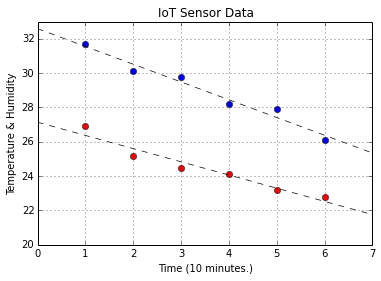

x data = [1, 2, 3, 4, 5, 6]
y1 data = [26.9, 25.2, 24.5, 24.1, 23.2, 22.8]
y2 data = [31.7, 30.1, 29.8, 28.2, 27.9, 26.1]

w1 = [ 0.76856649] 
b1 = [ 27.13998032] 

w2 = [ 1.03427529] 
b2 = [ 32.58662415] 

Linear Regression Model-1:
Y = w1*x1 + b1 = [ 0.76856649]x + [ 27.13998032]

If x1 = 0, y1 = [ 27.13998032]  
If y1 = 0, x1 = [ 35.31246948]  

Linear Regression Model-2:
Y2 = w2*x2 + b2 = [ 1.03427529]x + [ 32.58662415]

If x2 = 0, y2 = [ 32.58662415]  
If y2 = 0, x2 = [ 31.5067215]  


In [11]:
# "np" and "plt" are common aliases for NumPy and Matplotlib, respectively.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x_train represents the features of our training data, the diameters of the pizzas.
# A scikit-learn convention is to name the matrix of feature vectors X. 
# Uppercase letters indicate matrices, and lowercase letters indicate vectors.
x_train = np.array([xTime]).reshape(-1, 1)
#y_train = [35.43, 28.8, 28.48, 28.16, 28.16]

plt.figure()
plt.title('IoT Sensor Data')
plt.xlabel('Time (10 minutes.)')
plt.ylabel('Temperature & Humidity')
plt.plot(x_train, y1_train, 'ro')
plt.plot(x_train, y2_train, 'bo')
plt.axis([0, 7, 20, 33])
plt.grid(True)
# For example, W: [-1.5179733] b: [ 34.35990143] loss: 16.7751  loss means cost function
# y = W.x + b (or) y = a.x + b  
# y = -1.5179733 x + 34.35990143
# If x = 0, y = 34.35990143
# If y = 0, 1.5179733 x = 34.35990143, 
#           x = 34.35990143/1.5179733 = 22.6353793113  
w1 = abs(curr_W1)
b1 = abs(curr_b1)

w2 = abs(curr_W2)
b2 = abs(curr_b2)


print("         Linear Regression Models")
print("================================================")
print("")

# Temperature
if highTemBit > lowTemBit:
    minusTemData = -1
    print "The temperature data is ascending."

elif highTemBit < lowTemBit:
    minusTemData = 1
    print "The temperature data is descending."
    
elif highTemBit == lowTemBit:
    minusTemData = 1
    print "The temperature data is stable."
    
# Humidity
if highHumBit > lowHumBit:
    minusHumData = -1
    print "The humidity data is ascending."

elif highHumBit < lowHumBit:
    minusHumData = 1
    print "The humidity data is descending."
    
elif highHumBit == lowHumBit:
    minusHumData = 1
    print "The humidity data is stable."


#If y = 0, x = b/w
x1 = minusTemData*(b1/w1) 
x2 = minusHumData*(b2/w2) 
# If the data increases, it should add "-(minux)"  (Ex) x = -(b/w)  
# but If the data decreases, it should remove it.  (Ex) x =  (b/w)

#plt.plot([0, -x], [b, 0], color='k', linestyle='-', linewidth=0.7)
plt.plot([0, x1], [b1, 0], color='k', linestyle='--', linewidth=0.7)
plt.plot([0, x2], [b2, 0], color='k', linestyle='--', linewidth=0.7)
#plt.plot([30, 0], [57, b], color='k', linestyle='-', linewidth=0.7)
#plt.plot([0, 2.6353793], [34.35990143, 0], color='k', linestyle='-', linewidth=0.7)
plt.show()

print("x data = %s"%(xTime))
print("y1 data = %s"%(y1Data))
print("y2 data = %s"%(y2Data))
print("")
print("w1 = %s "%(w1))
print("b1 = %s "%(b1))
print("")
print("w2 = %s "%(w2))
print("b2 = %s "%(b2))
print("")
print("Linear Regression Model-1:")
print("Y = w1*x1 + b1 = %sx + %s"%(w1,b1))
print("")
print("If x1 = 0, y1 = %s  "%(b1))
print("If y1 = 0, x1 = %s  "%(x1))
print("")
print("Linear Regression Model-2:")
print("Y2 = w2*x2 + b2 = %sx + %s"%(w2,b2))
print("")
print("If x2 = 0, y2 = %s  "%(b2))
print("If y2 = 0, x2 = %s  "%(x2))

### Predict next temperature after 10 mins, 20 mins, 30 mins, and 40 mins.

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

#x_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
#y_train = [25, 23, 24, 23, 24]

# Create an instance of the estimator, LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(x_train, y1_train)
# Predict the data of a temperature with a trend that has never been seen before
test_temp = np.array([[6]])
predicted_temp = model.predict(test_temp)[0]
print('After 10 minutes, it would be: %.2f °C.' % predicted_temp)

test_temp = np.array([[7]])
predicted_temp = model.predict(test_temp)[0]
print('After 20 minutes, it would be: %.2f °C.' % predicted_temp)

test_temp = np.array([[8]])
predicted_temp = model.predict(test_temp)[0]
print('After 30 minutes, it would be: %.2f °C.' % predicted_temp)

test_temp = np.array([[9]])
predicted_temp = model.predict(test_temp)[0]
print('After 40 minutes, it would be: %.2f °C.' % predicted_temp)

After 10 minutes, it would be: 22.53 °C.
After 20 minutes, it would be: 21.76 °C.
After 30 minutes, it would be: 20.99 °C.
After 40 minutes, it would be: 20.22 °C.


### Predict next humidity after 10 mins, 20 mins, 30 mins, and 40 mins.

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

#x_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
#y_train = [25, 23, 24, 23, 24]

# Create an instance of the estimator, LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(x_train, y2_train)
# Predict the data of a temperature with a trend that has never been seen before
test_hum = np.array([[6]])
predicted_hum = model.predict(test_hum)[0]
print('After 10 minutes, it would be: %.2f percent.' % predicted_hum)

test_hum = np.array([[7]])
predicted_hum = model.predict(test_hum)[0]
print('After 20 minutes, it would be: %.2f percent.' % predicted_hum)

test_hum = np.array([[8]])
predicted_hum = model.predict(test_hum)[0]
print('After 30 minutes, it would be: %.2f percent.' % predicted_hum)

test_hum = np.array([[9]])
predicted_hum = model.predict(test_hum)[0]
print('After 40 minutes, it would be: %.2f percent.' % predicted_hum)

After 10 minutes, it would be: 26.38 percent.
After 20 minutes, it would be: 25.35 percent.
After 30 minutes, it would be: 24.31 percent.
After 40 minutes, it would be: 23.28 percent.


In [2]:
# Functions to show the Graphs

import numpy as np
from IPython.display import clear_output, Image, display, HTML


def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [3]:
show_graph(tf.get_default_graph())

## References

* SQLite Tutorial: https://www.tutorialspoint.com/sqlite/
* SQLite Quick Guide: https://www.tutorialspoint.com/sqlite/sqlite_quick_guide.htm
* SQLite - Python Tuotorial: https://www.tutorialspoint.com/sqlite/sqlite_python.htm
* SQLite - Python Quick Guide: https://github.com/leehaesung/SQLite-Python_Quick_Guide
* Get Started TensorFlow: https://www.tensorflow.org/get_started/get_started